# Analyzing Measurement Data for 1000720 Fixture 

This is an analysis of the initial set of measurements of the cone & ball positons on the 1000720 Ball Potting fixture. The key dimensions are the locations of each ball relative to the datum created by the gauge pin or horn OD (Datum E on the drawing) as well as the height relative to Datum D. Not only is the relative location critical, but the centroid of the bolt circle as well.

In [1]:
# allows us to show plots in the web browser
%matplotlib inline

## Import The Necessary Libraries

In [2]:
# Simple math & data manipulation
import numpy as np
import pandas as pd
import math
import statistics
from statistics import mean 

# Allows importing of Jupyter Notebooks
import import_ipynb

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ellipse import LsqEllipse
from matplotlib.patches import Ellipse

# Custom dataclasses in the form of Jupyter Notebooks
from loc3d import Loc3D
from direction3d import Direction3D

importing Jupyter notebook from loc3d.ipynb
importing Jupyter notebook from direction3d.ipynb


# Loading the Data

In [17]:
# First set of data
filename1 = "meas_data_1.xlsx"
# Second set of data
filename2 = "meas_data_2.xlsx"
# Third set of data
filename3 = "meas_data_3.xlsx"

# Creating an instance of Loc3D to use the data_load() method on
loc3d = Loc3D()

# Loading the nominal data and first set of data
data_nom, data_1 = loc3d.data_load(filename1)

# Loading both nominal data and second set of data into a single variable
more_data = loc3d.data_load(filename2)

# Separating out the measurement data from the nominal data since we already
# have the nominal data above
data_2 = more_data[1]

# Loading the third set of data
third_data = loc3d.data_load(filename3)

# Separating the measurement data from the nominal data, which we already have
data_3 = third_data[1]

# Creating an X & Y list of locations that are shifted to be centered on Datum H
shift_x = [x + 0.022 for x in data_3.x]
shift_y = [y - 0.021 for y in data_3.y]

# Create a Loc3D class with the X & Y shifted data
shifted_data_3 = Loc3D(shift_x, shift_y, data_3.z)

# Create an average set of data bewteen the first and third set of measurements
average_x_loc = [np.round((x1 + x2)/2, 3) for x1, x2 in zip(data_1.x, data_3.x)]
average_y_loc = [np.round((y1 + y2)/2, 3) for y1, y2 in zip(data_1.y, data_3.y)]
average_z_loc = [np.round((z1 + z2)/2, 3) for z1, z2 in zip(data_1.z, data_3.z)]

data_average_1_and_3 = Loc3D(average_x_loc, average_y_loc, average_z_loc, "Averaged Data")

## Plot of First Measurements vs Nominal Locations

X-directions:
[-0.035 -0.045 -0.041 -0.039 -0.036 -0.032 -0.037 -0.041 -0.044 -0.035
 -0.036 -0.042 -0.024 -0.031 -0.029 -0.04 ]
X-direction Avg:
-0.037

Y-directions:
[0.001 0.008 0.004 0.002 0.    0.004 0.003 0.005 0.013 0.003 0.003 0.005
 0.003 0.016 0.014 0.011]
Y-direction Avg:
0.006

Z-directions:
[ 0.009  0.015  0.002  0.01   0.007  0.005  0.006  0.008 -0.003  0.006
 -0.019 -0.001  0.     0.     0.     0.   ]
Z-direction Avg:
0.003

Total Distances:
[0.036 0.048 0.041 0.04  0.037 0.033 0.038 0.042 0.046 0.036 0.041 0.042
 0.024 0.035 0.032 0.041]
Average Total Distance:
0.038


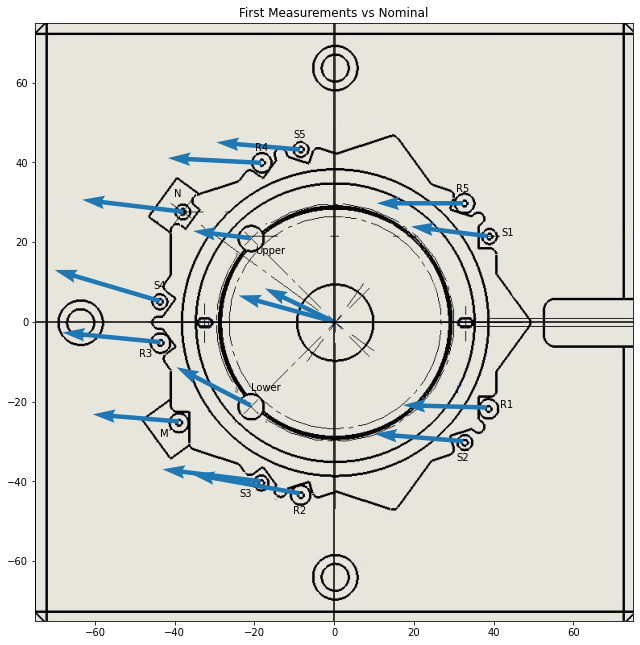

In [4]:
# Create a Direction3D object using the nominal location data and the first set of measurement data
dir_1 = Direction3D("First Set", data_nom, data_1)

# Calculate the shift in each cartesian direction
dir_1.find_dir() # The quiver_plot function does this by default

# Plot the directional data from the nominal location to show the direction each feature has shifted
dir_1.quiver_plot(title="First Measurements vs Nominal", scale=0.25)

## Plot Second Measurements (Rot 90-degrees) vs. Nominal

X-directions:
[ 0.001 -0.003 -0.001 -0.013 -0.005  0.     0.     0.     0.     0.
  0.     0.    -0.019  0.028  0.004 -0.014]
X-direction Avg:
-0.001

Y-directions:
[ 0.009  0.011  0.007  0.007  0.011  0.     0.     0.     0.     0.
  0.     0.     0.013  0.037 -0.017 -0.012]
Y-direction Avg:
0.004

Z-directions:
[0.007 0.016 0.007 0.011 0.009 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Z-direction Avg:
0.003

Total Distances:
[0.011 0.02  0.01  0.018 0.015 0.    0.    0.    0.    0.    0.    0.
 0.023 0.046 0.017 0.018]
Average Total Distance:
0.011


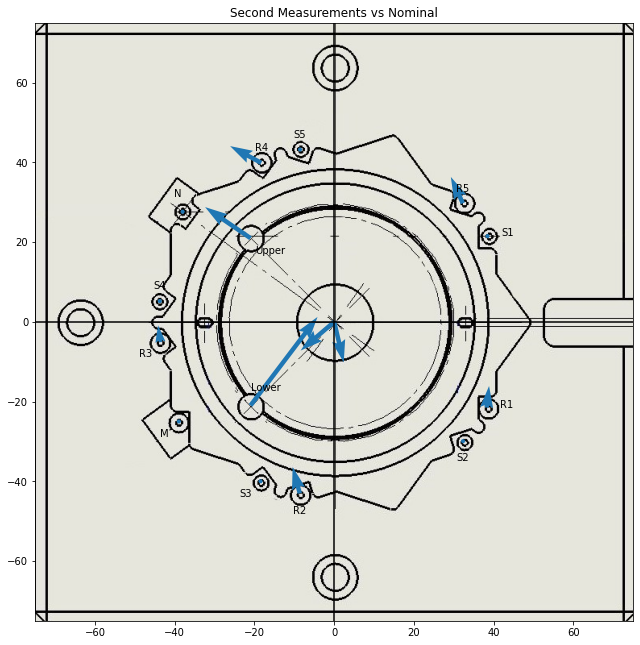

In [5]:
# Create a Direction3D object using the nominal location data and the second set of measurement data
dir_2 = Direction3D("Second Set", data_nom, data_2)

# Plot the directional data from the nominal location to show the direction each feature has shifted
dir_2.quiver_plot(title="Second Measurements vs Nominal", scale=0.25)

## Third Set of Ball Data - 06/08/2022

X-directions:
[-0.033     -0.042     -0.044     -0.044     -0.041     -0.037
 -0.036     -0.042     -0.043     -0.041     -0.046     -0.052
  0.         0.        -0.022     -0.0341376]
X-direction Avg:
-0.035

Y-directions:
[0.011     0.016     0.018     0.017     0.017     0.015     0.01
 0.011     0.019     0.02      0.011     0.01      0.        0.
 0.021     0.0213614]
Y-direction Avg:
0.014

Z-directions:
[-0.004  0.005 -0.011  0.     0.004 -0.017 -0.016 -0.01  -0.02  -0.018
 -0.038 -0.008  0.     0.     0.     0.   ]
Z-direction Avg:
-0.008

Total Distances:
[0.035 0.045 0.049 0.047 0.045 0.043 0.041 0.045 0.051 0.049 0.061 0.054
 0.    0.    0.03  0.04 ]
Average Total Distance:
0.04


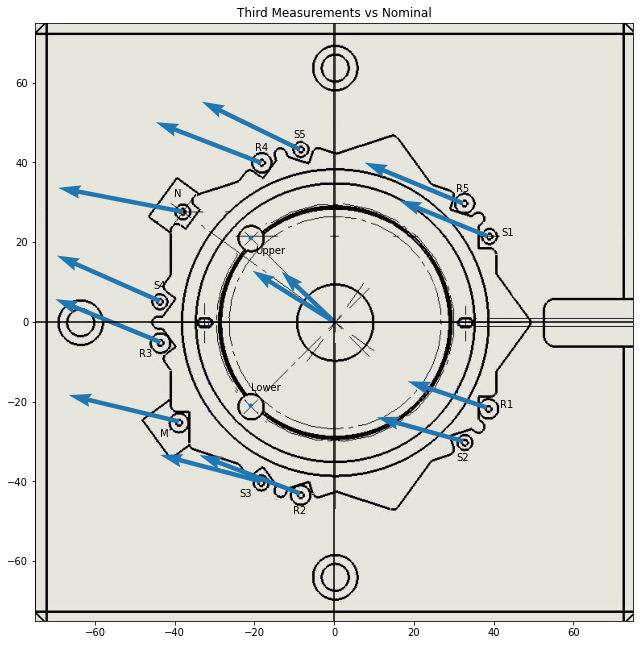

In [6]:
# Create a Direction3D object using the nominal location data and the second set of measurement data
dir_3 = Direction3D("Third Set", data_nom, data_3)

# Plot the directional data from the nominal location to show the direction each feature has shifted
dir_3.quiver_plot(title="Third Measurements vs Nominal", scale=0.25)

In [7]:
x_dist, y_dist, z_dist, distances = dir_3.find_dir()

distance = math.sqrt(np.mean(x_dist)**2+np.mean(y_dist)**2+np.mean(z_dist)**2)

print(f'{distances}\n\n{np.mean(distances)}')

[0.035 0.045 0.049 0.047 0.045 0.043 0.041 0.045 0.051 0.049 0.061 0.054
 0.    0.    0.03  0.04 ]

0.0396875


X-directions:
[-0.011     -0.02      -0.022     -0.022     -0.019     -0.015
 -0.014     -0.02      -0.021     -0.019     -0.024     -0.03
  0.022      0.022      0.        -0.0121376]
X-direction Avg:
-0.013

Y-directions:
[-0.01      -0.005     -0.003     -0.004     -0.004     -0.006
 -0.011     -0.01      -0.002     -0.001     -0.01      -0.011
 -0.021     -0.021      0.         0.0003614]
Y-direction Avg:
-0.007

Z-directions:
[-0.004  0.005 -0.011  0.     0.004 -0.017 -0.016 -0.01  -0.02  -0.018
 -0.038 -0.008  0.     0.     0.     0.   ]
Z-direction Avg:
-0.008

Total Distances:
[0.015 0.021 0.025 0.022 0.02  0.023 0.024 0.024 0.029 0.026 0.046 0.033
 0.03  0.03  0.    0.012]
Average Total Distance:
0.024
[-0.004  0.005 -0.011  0.     0.004 -0.017 -0.016 -0.01  -0.02  -0.018
 -0.038 -0.008  0.     0.     0.     0.   ]
-0.008


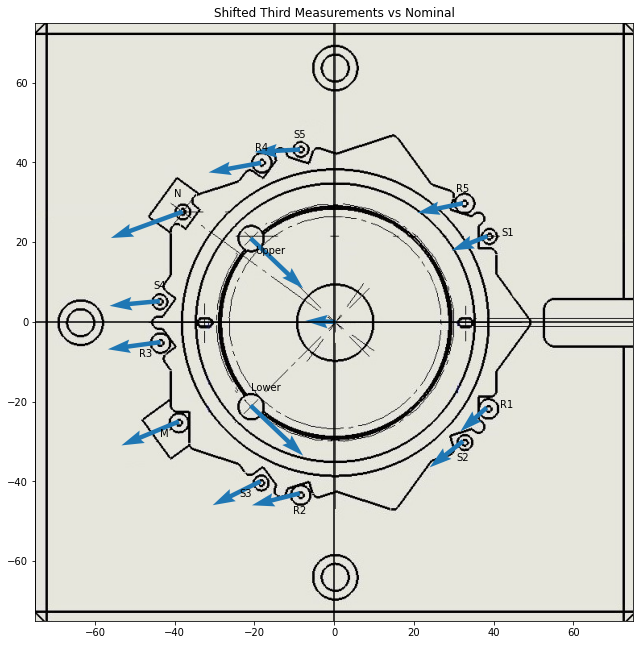

In [8]:
# Create a Direction3D object using the nominal location data and a shifted version of the third set of measurement data
shifted_dir_3 = Direction3D("Shifted Third Set",data_nom, shifted_data_3)

# Plot the directional data from the nominal location to show the direction each feature has shifted
shifted_dir_3.quiver_plot(title="Shifted Third Measurements vs Nominal", scale=0.25)

print(shifted_dir_3.z_dir)
print(np.round(np.mean(shifted_dir_3.z_dir),3))

x_dist, y_dist, z_dist, distances = shifted_dir_3.find_dir()

X-directions:
[ 0.002      0.003     -0.003     -0.005     -0.005     -0.005
  0.001     -0.001      0.001     -0.006     -0.01      -0.01
  0.024      0.031      0.007      0.0058624]
X-direction Avg:
0.002

Y-directions:
[ 0.01       0.008      0.014      0.015      0.017      0.011
  0.007      0.006      0.006      0.017      0.008      0.005
 -0.003     -0.016      0.007      0.0103614]
Y-direction Avg:
0.008

Z-directions:
[-0.013 -0.01  -0.013 -0.01  -0.003 -0.022 -0.022 -0.018 -0.017 -0.024
 -0.019 -0.007  0.     0.     0.     0.   ]
Z-direction Avg:
-0.011

Total Distances:
[0.017 0.013 0.019 0.019 0.018 0.025 0.023 0.019 0.018 0.03  0.023 0.013
 0.024 0.035 0.01  0.012]
Average Total Distance:
0.02


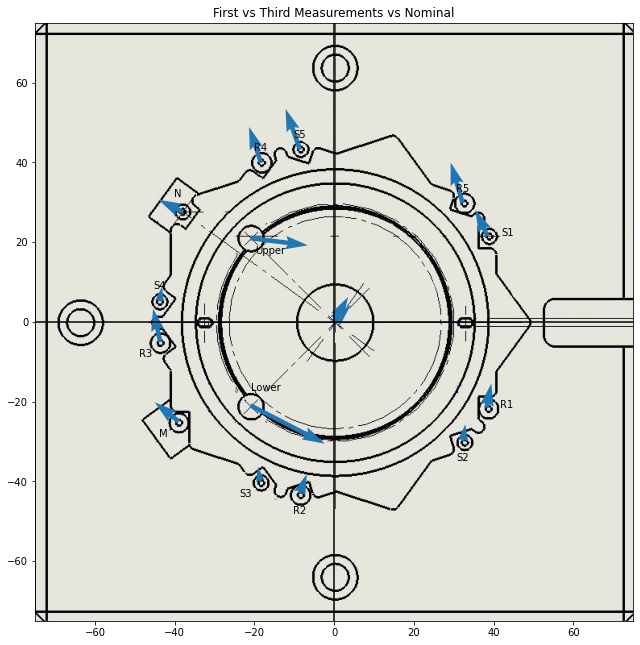

In [18]:
dir_1st_3rd_difference = Direction3D("First vs Third Sets", data_1, data_3)

dir_1st_3rd_difference.quiver_plot(title="First vs Third Measurements vs Nominal", scale=0.25)

X-directions:
[-0.034 -0.044 -0.042 -0.041 -0.039 -0.034 -0.037 -0.041 -0.043 -0.038
 -0.041 -0.047 -0.012 -0.016 -0.026 -0.037]
X-direction Avg:
-0.036

Y-directions:
[0.006 0.012 0.011 0.009 0.008 0.01  0.006 0.008 0.016 0.012 0.007 0.007
 0.002 0.008 0.018 0.016]
Y-direction Avg:
0.01

Z-directions:
[ 0.002  0.01  -0.004  0.005  0.006 -0.006 -0.005 -0.001 -0.012 -0.006
 -0.029 -0.005  0.     0.     0.     0.   ]
Z-direction Avg:
-0.003

Total Distances:
[0.035 0.047 0.044 0.042 0.04  0.036 0.038 0.042 0.047 0.04  0.051 0.048
 0.012 0.018 0.032 0.04 ]
Average Total Distance:
0.038


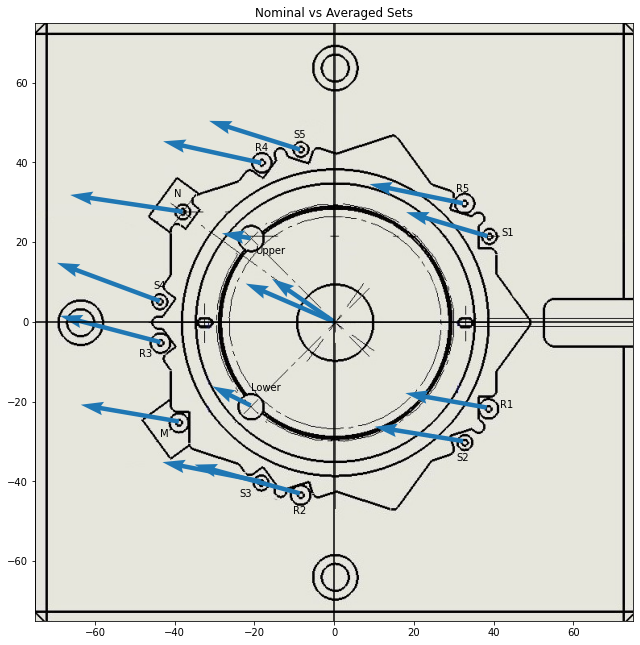

In [19]:
dir_avgerage_1_and_3 = Direction3D("Nominal vs Averaged Sets", data_nom, data_average_1_and_3)

dir_avgerage_1_and_3.quiver_plot(title="Nominal vs Averaged Sets", scale=0.25)

center of fitted circle = [-0.038  0.009] 
 radius = 43.883 +/- stddev= 0.0052
center of fitted circle = [-0.039  0.009] 
 radius = 44.06 +/- stddev= 0.0017


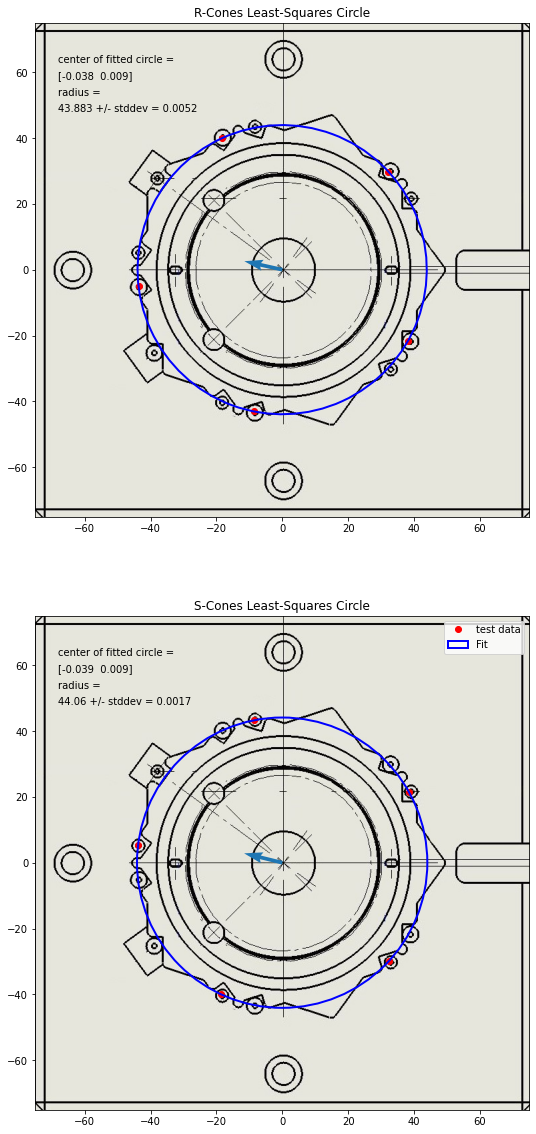

In [20]:
# Plot the least-squares circle created by the R-cone & S-cone location data
dir_avgerage_1_and_3.ls_circle_plot()

## Least-Squares Circles

center of fitted circle = [-0.038  0.003] 
 radius = 43.882 +/- stddev= 0.0051
center of fitted circle = [-0.038  0.004] 
 radius = 44.059 +/- stddev= 0.0058


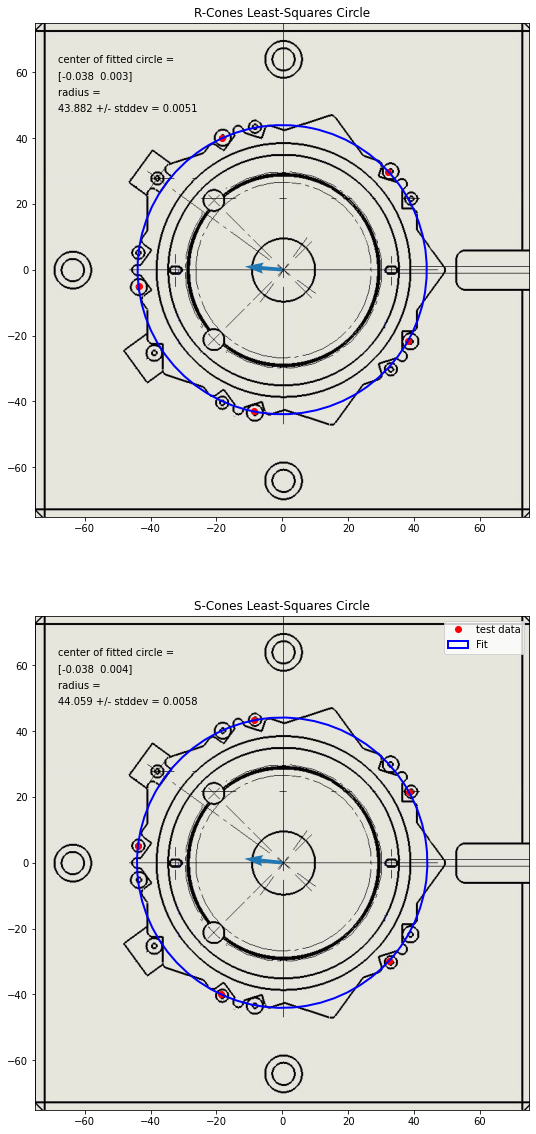

In [11]:
# Plot the least-squares circle created by the R-cone & S-cone location data
dir_1.ls_circle_plot()

center of fitted circle = [-0.039  0.015] 
 radius = 43.885 +/- stddev= 0.0057
center of fitted circle = [-0.04   0.014] 
 radius = 44.061 +/- stddev= 0.0026


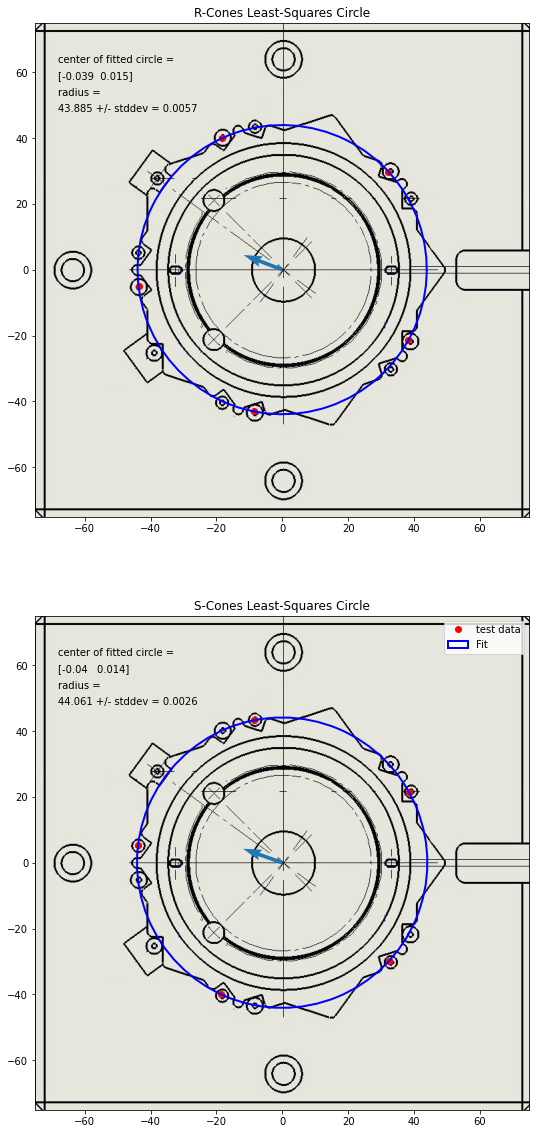

In [12]:
dir_3.ls_circle_plot()

center of fitted circle = [-0.017 -0.006] 
 radius = 43.885 +/- stddev= 0.0057
center of fitted circle = [-0.018 -0.007] 
 radius = 44.061 +/- stddev= 0.0026


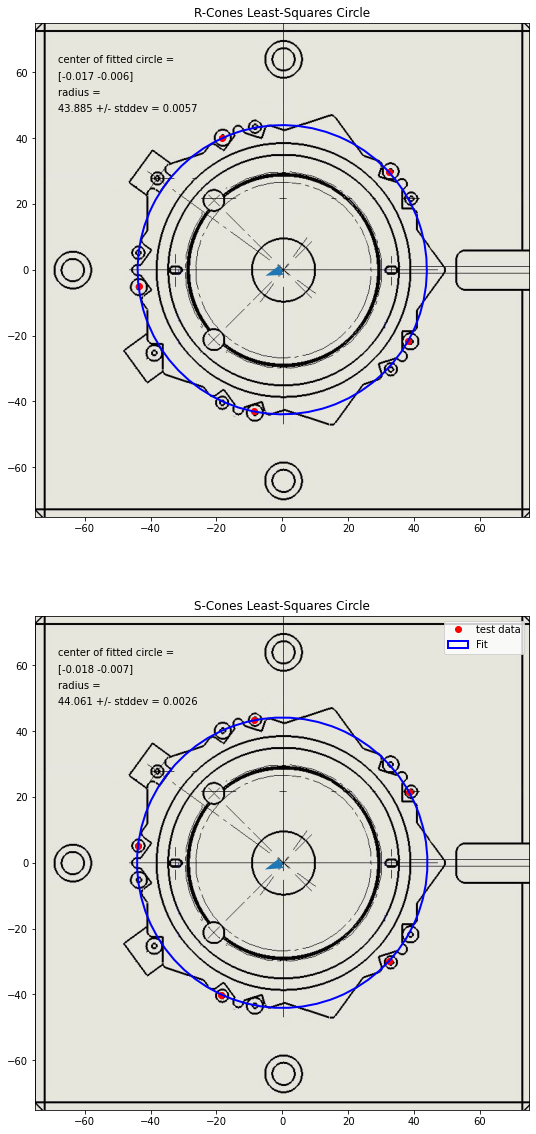

In [13]:
shifted_dir_3.ls_circle_plot()

In [14]:
# Plotting the nominal R-cone locations in 3D
fig = go.Figure()
fig.add_trace(go.Scatter3d(
        mode='markers',
        x=data_nom.x[0:5],
        y=data_nom.y[0:5],
        z=data_nom.z[0:5],
        marker=dict(color="blue",size=[20]*len(data_nom.x[0:5]),sizemode='diameter',
        opacity=0.25
        )
    )
)

In [15]:


fig = make_subplots(rows=1, cols=3,
                    specs=[[{'type': 'scene'}, {'type': 'scene'}, {'type': 'scene'}]])

fig.add_trace(
    go.Scatter3d(
        mode='markers',
        x=data_nom.x[0:5],
        y=data_nom.y[0:5],
        z=data_nom.z[0:5],
        marker=dict(color="blue",size=[20]*len(data_nom.x[0:5]),sizemode='diameter', opacity=0.25)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(
        mode='markers',
        x=data_nom.x[0:5],
        y=data_nom.y[0:5],
        z=data_nom.z[0:5],
        marker=dict(color="blue",size=[20]*len(data_nom.x[0:5]),sizemode='diameter', opacity=0.25)),
    row=1, col=2
)

fig.add_trace(
    go.Scatter3d(
        mode='markers',
        x=data_nom.x[0:5],
        y=data_nom.y[0:5],
        z=data_nom.z[0:5],
        marker=dict(color="blue",size=[20]*len(data_nom.x[0:5]),sizemode='diameter', opacity=0.25)),
    row=1, col=3
)

fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()